In [ ]:
# import library

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [123]:
# load dataset

x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
x_val = pd.read_csv("x_val.csv")
y_val = pd.read_csv("y_val.csv")
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

In [124]:
# Convert y to NumPy arrays if still pandas Series
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_test = x_test.to_numpy()

# convert to 1D
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary Cross-Entropy Loss
def compute_loss(y_true, y_pred):
    m = len(y_true)
    # Avoid log(0) by adding epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Initialize parameters
m, n = x_train.shape
w = np.zeros(n)
b = 0
alpha = 0.01  # learning rate
epochs = 1000

# Early stopping settings
patience = 5
best_val_loss = float('inf')
wait = 0

# Track losses
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Forward pass
    z_train = np.dot(x_train, w) + b
    y_pred_train = sigmoid(z_train)
    s
    # Compute gradients
    dw = (1/m) * np.dot(x_train.T, (y_pred_train - y_train))
    db = (1/m) * np.sum(y_pred_train - y_train)
    
    # Update parameters
    w -= alpha * dw
    b -= alpha * db
    
    # Compute train and validation loss
    train_loss = compute_loss(y_train, y_pred_train)
    z_val = np.dot(x_val, w) + b
    y_pred_val = sigmoid(z_val)
    val_loss = compute_loss(y_val, y_pred_val)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
        best_w = w.copy()
        best_b = b
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping at epoch {epoch}")
            w = best_w
            b = best_b
            break
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# Final evaluation on test set
z_test = np.dot(x_test, w) + b
y_pred_test_prob = sigmoid(z_test)
y_pred_test = (y_pred_test_prob >= 0.5).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("\nFinal Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Epoch 0, Train Loss: 0.6931, Val Loss: 0.6916
Epoch 100, Train Loss: 0.5802, Val Loss: 0.5781
Epoch 200, Train Loss: 0.5150, Val Loss: 0.5137
Epoch 300, Train Loss: 0.4742, Val Loss: 0.4740
Epoch 400, Train Loss: 0.4473, Val Loss: 0.4482
Epoch 500, Train Loss: 0.4289, Val Loss: 0.4309
Epoch 600, Train Loss: 0.4159, Val Loss: 0.4188
Epoch 700, Train Loss: 0.4065, Val Loss: 0.4103
Epoch 800, Train Loss: 0.3995, Val Loss: 0.4041
Epoch 900, Train Loss: 0.3942, Val Loss: 0.3995

Final Results:
Accuracy: 0.8469
Precision: 0.5000
Recall: 0.0435
F1 Score: 0.0800


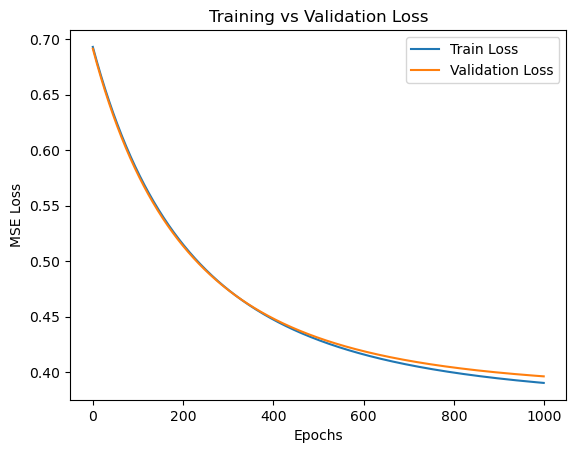

In [126]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [127]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Predict probabilities
z = np.dot(x_test, w) + b
y_pred_prob = sigmoid(z)

# Convert to class labels (threshold = 0.3)
y_pred = (y_pred_prob >= 0.2).astype(int)


In [128]:
# Accuracy
accuracy = np.mean(y_pred == y_test)

# Optional: Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6112
Precision: 0.2464
Recall: 0.7478
F1 Score: 0.3707


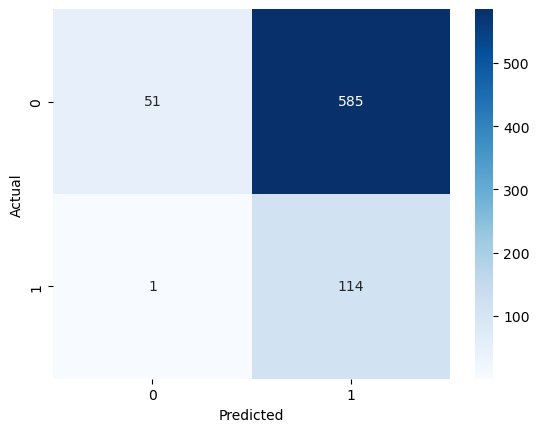

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
